## Notebook to show how new headings after specular collisions with wall work
#### In the below image, yellow is the initial starting point, blue is the point at which the particle hits the wall, and red is the final location.

Correct % of Cases:  1.0


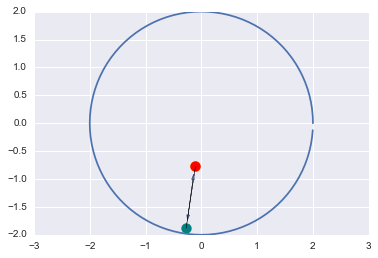

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## init particle
r_enc = 0.1
R = 2
v_x = -1+2*np.random.rand()  # somewhere between -1 and 1
v_y = -1+2*np.random.rand()

## Init Disk
N_points = 100
x_data = np.zeros((100))
y_data = np.zeros((100))
for i in range(N_points):
    x_data[i] = R*np.cos(i*2*np.pi/N_points)
    y_data[i] = R*np.sin(i*2*np.pi/N_points)
    
tick = 0
n_tries = 1000
for j in range(n_tries):
    ## Place Particle
    radius = np.random.rand()*(R-r_enc)
    theta = np.random.rand()*(2*np.pi)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)

    t1 = (-1*(x*v_x+y*v_y)+np.sqrt((x*v_x+y*v_y)**2-(v_x**2+v_y**2)*(x**2+y**2-(R-r_enc)**2)))/(v_x**2+v_y**2)
    #t2 = (-1*(x*v_x+y*v_y)-np.sqrt((x*v_x+y*v_y)**2-(v_x**2+v_y**2)*(x**2+y**2-(R-r_enc)**2)))/(v_x**2+v_y**2)

    t = t1
    #if t1 >= 0:
    #    t = t1
    #else:
    #    t = t2

    x_new = x+v_x*t
    y_new = y+v_y*t

    ## Get particle location after reflection
    if (x >= 0 and y >= 0) or (x >= 0 and y < 0):
        angle1 = np.arctan(y_new/x_new)
        angle2 = np.arctan(y/x)
    else:
        angle1 = np.pi+np.arctan(y_new/x_new)
        angle2 = np.pi+np.arctan(y/x)
        
#    diff = angle1-angle2
    final = 2*angle1-angle2
    x_f = np.sqrt(x**2+y**2)*np.cos(final)
    y_f = np.sqrt(x**2+y**2)*np.sin(final)
    vx_f = (x_f-x_new)/t
    vy_f = (y_f-y_new)/t

    dist_before = np.sqrt((x_new-x)**2+(y_new-y)**2)
    dist_after = np.sqrt((x_f-x_new)**2+(y_f-y_new)**2)
    if np.isclose(dist_before,dist_after):
        tick = tick + 1
        #print 'Correct'

print 'Correct % of Cases: ',tick/float(n_tries)
#print 'Velocity Before: ', np.sqrt(v_x**2+v_y**2)
#print 'Velocity After: ', np.sqrt(vx_f**2+vy_f**2)
ax = plt.axes()
ax.arrow(x,y,v_x,v_y,head_width=0.05,head_length=0.1)  # Draw velocity
ax.arrow(x_new,y_new,vx_f,vy_f,head_width=0.05,head_length=0.1)  # Draw velocity
plt.plot(x_data,y_data)
plt.scatter(x,y,color='orange',s=100)
plt.scatter(x_new,y_new,color='teal',s=100)
plt.scatter(x_f,y_f,color='red',s=100)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.axes().set_aspect('equal', 'datalim')